In [1]:
#IMPORTS
import numpy as np
import os,sys,math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sys.path.append(os.getcwd()+"/Code") # so that we can import the modules below
#feel free to have a look into Network, Layer or RBM implementations to see how they work
from NN import Network,Layer,pretrain_autoencoder, plot_results
from RBM import RBM
#DATASETS DIRECTORIES
MNIST_TRAIN_DIR="./Data/MNIST1_train.npz"
MNIST_TEST_1_DIR="./Data/MNIST1_test_1.npz"
MNIST_TEST_2_DIR="./Data/MNIST1_test_2.npz"
PATCHES_DIR="./Data/PATCHES.npy"

In [2]:
#An example how to create,train and use Network structure:
x_mock_data = np.array([[0,0],[0,1],[1,0],[1,1]])
y_mock_data = np.array([0,1,1,0])[:,None]

NN = Network([2,4,2,1],activations=["sigmoid"]) #define a network architecture & activation
print(NN.get_summary())
NN.tie_layer_weights(1,3)
NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
NN.fit(x_mock_data,y_mock_data,batch_size=4, #fit to data
       epochs=2000,x_val=x_mock_data,y_true_val=y_mock_data) 
print("\n Targets:")
print((y_mock_data))
print("\n Predictions:")
print(NN.predict(x_mock_data)) # get predictions
print("\n Error:")
print(NN.evaluate(x_mock_data,y_mock_data)) # get error

print(x_mock_data.shape)
print(y_mock_data.shape)

0: Input	 in:(None, 2)	 out:(None, 2)
1: Dense	 in:(None, 2)	 out:(None, 4)
2: Sigmoid	 in:(None, 4)	 out:(None, 4)
3: Dense	 in:(None, 4)	 out:(None, 2)
4: Sigmoid	 in:(None, 2)	 out:(None, 2)
5: Dense	 in:(None, 2)	 out:(None, 1)
6: Sigmoid	 in:(None, 1)	 out:(None, 1)
None
2000:	 train err: 0.13799	 val err: 0.13796	 patience: 0																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																																															
 Targets:
[[0]
 [1]
 [1]
 [0]]

 Predictions:
[[0.1070113 ]
 [0.86243687]
 [0.5036163 ]
 [0.52447989]]

 Error:
[0.13796274]
(4, 2)
(4, 1)


### Load Mnist Dataset

In [3]:
#load the MNIST dataset
#train dataset for A1,A2,A3,A8,A9
X =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_0"]
y =  np.load(MNIST_TRAIN_DIR,allow_pickle=True)["arr_1"]
# y = y.reshape((y.shape[0],1))
#test dataset for A1,A2,A3
x_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_0"]
y_test = np.load(MNIST_TEST_1_DIR,allow_pickle=True)["arr_1"]
# y_test = y_test.reshape((y_test.shape[0],1))
#test dataset for A8,A9
x_test_2 =  np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_0"]
y_test_2 = np.load(MNIST_TEST_2_DIR,allow_pickle=True)["arr_1"]
#validation split
#create some validation data

x_train = X[:int(3000*0.8)]
y_train= y[:int(3000*0.8)]

x_val = X[int(3000*0.8):]
y_val = y[int(3000*0.8):]


# print(X.shape)
# print(y.shape)
# np.random.seed(3)
# indices = numpy.random.permutation(X.shape[0])
# print(indices)
# x_ran = X[indices]
# y_ran = y[indices]
# print(x_ran.shape)
# x_val = x_ran[:int(0.2*X.shape[0]),:]
# y_val = y_ran[:int(0.2*X.shape[0]),]
# y_val = y_val.reshape((y_val.shape[0],1))

print(y_val.shape)

(600,)


In [ ]:
#Normalize sklearn

def normalize(x):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x)
    return x_train

x_train=normalize(x_train)
x_val =normalize(x_val)
x_test=normalize(x_test)
x_test_2=normalize(x_test_2)

In [34]:
#Normalization
def standard(x):
    res = x - np.mean(x, axis=0).reshape(1, -1)
    std = np.std(x)
    x_std = res / (std + 1e-6)
    return x_std
    # Normalize X
#     x_mean = x.mean(0)
#     x_pre = x - x_mean.reshape(1, -1)
#     std= np.std(x)
#     xnor = x_pre/(std+1e-6)
#     return xnor

def norm(x):
    ran = np.max(x, axis=0) - np.min(x, axis=0)
    xnor = (x - np.min(x, axis=0).reshape(1, -1)) / (ran + 1e-6)
    return xnor  
    
    
#     max = np.max(x,axis = 0)
#     scale = (np.max(x,axis = 0))-(np.min(x,axis= 0))
#     mat = (x-np.min(x,axis=0).reshape(1,-1))/(scale+1e-6)
#     return mat
    
x_train=standard(x_train)
x_val =standard(x_val)
x_test=standard(x_test)
x_test_2=standard(x_test_2)
print(X.mean(1).shape)

(3000,)


## Part 1. Data Compression

### <span style="color:red">=========== Assignment 1 ===========</span>

In [4]:
print(x_train.shape)

(2400, 784)


In [ ]:
#Create a NN, tie its weights using the function:
#Network.tie_weights(layer_index_1,layer_index_2)
#Remember to do this before calling fit()!
#To visualize the results, use:
#plot_results(Network,data,hidden_units)
#Remember to record your results for A4!
hidden_arch = [40,80,160,320]
ae_mean=[]

for i in hidden_arch:
    #NN
    AE_NN = Network([784,i,784],activations=["sigmoid"]) #define a network architecture & activation
    print(AE_NN.get_summary())


    AE_NN.tie_layer_weights(1,3)
    print('\n Layer1 1 and layer 3 are tied\n'
         ',which means they are sharing a weight matrix\n')

    AE_NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum

    
    AE_NN.fit(x_train,x_train,batch_size=100, #fit to data
       epochs=150,x_val=x_val,y_true_val=x_val,patience= 25)

    mean = plot_results(AE_NN, x_test, i)
    ae_mean=np.append(ae_mean,mean)

In [ ]:
print(ae_mean)

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [ ]:
#Train a DAE
#add gaussian noise to data 

x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.1, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.1, size=x_test.shape)
x_val_noisy = x_val + np.random.normal(loc=0.0, scale=0.1, size=x_val.shape)

x_train_noisy = np.clip(x_train_noisy, -1., 1.)
x_test_noisy = np.clip(x_test_noisy, -1., 1.)
x_val_noisy = np.clip(x_val_noisy, -1., 1.)

In [ ]:
hidden_arch = [40,80,160,320]
dae_mean=[]

for i in hidden_arch:
    #NN
    DAE_NN = Network([784,i,784],activations=["sigmoid"]) #define a network architecture & activation
    print(DAE_NN.get_summary())


    DAE_NN.tie_layer_weights(1,3)
    print('\n Layer1 1 and layer 3 are tied\n'
         ',which means they are sharing a weight matrix\n')

    DAE_NN.set_lr(1.0,momentum=0.0)  #set learning rate and momentum
    
    DAE_NN.fit(x_train_noisy,x_train,batch_size=100, #fit to data
       epochs=150,x_val=x_val_noisy,y_true_val=x_val,patience= 25)

    mean = plot_results(DAE_NN, x_test_noisy, i)
    dae_mean=np.append(dae_mean,mean)
print(dae_mean)

In [ ]:
print(dae_mean)

### <span style="color:red">=========== End of Assignment 2 ===========</span>

### <span style="color:red">=========== Assignment 3 ===========</span>

In [ ]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units

hidden_arch = [40,80,160,320]
rbm_mean=[]

for i in hidden_arch:
    rbm = RBM(784,n_hid=i, 
                 use_gaussian_visible_sampling=False,
                 use_gaussian_hidden_sampling=False,
                 use_sample_vis_for_learning=False)
    rbm.set_lr(0.01,0.0,momentum=0.5)

    rbm.fit(x_train,x_val,batch_size=100,
           epochs=1500,patience=25)
    x_test_reco = rbm.reconstruct(x_test,False,False)

    mean = plot_results(rbm, x_test_reco, i)
    rbm_mean = np.append(rbm_mean,mean)

In [ ]:
print(rbm_mean)

In [ ]:
#Here use the RBM class to obtain your results.
#The RBM has to have gaussian visible and binomial hidden units
# create a list to save the MSE of RBM
RBM_MSE = []

for i in hidden_arch:
    my_RBM = RBM(n_vis=784,n_hid=i, use_gaussian_visible_sampling=False,
        use_gaussian_hidden_sampling=False, use_sample_vis_for_learning=False)
    
    my_RBM.set_lr(0.01,0.0, momentum=0.5)  #set learning rate and momentum

    # calling fit
    my_RBM.fit(x_train, x_val,batch_size = 100,epochs = 1500,patience = 25)
    # reconstruct 
    x_test_reco = my_RBM.reconstruct(x_test, False, False)
    # visualize the results
    RBM_MSE.append(plot_results(my_RBM,x_test_reco,i))

### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

In [ ]:
print(rbm_mean)

In [ ]:
#Create a plot comparing compression power of different AE

ratio = np.true_divide(hidden_arch,784)
x_axis = np.log(ratio)
print(x_axis)

y1 = np.log(ae_mean)
y2 = np.log(dae_mean)
y3 = np.log(rbm_mean)
print(y1)
print(y2)
print(y3)
plt.xlabel("log (Compression Ratio)")
plt.ylabel("log (Averaged MSE Error)")
plt.xticks(x_axis, np.round(x_axis,4))
plt.plot(x_axis, y1, label='AE', color='b')
plt.plot(x_axis, y2, label='DAE',color='g')
plt.plot(x_axis, y3, label='RBM',color='r')
plt.legend()
plt.show()

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

[Answer]

In [ ]:
hidden_arch = [40,80,160,320]
rbm_mean=[]

for i in hidden_arch:
    rbm = RBM(784,n_hid=i, 
                 use_gaussian_visible_sampling=True,
                 use_gaussian_hidden_sampling=True,
                 use_sample_vis_for_learning=True)
    rbm.set_lr(0.01,0.0,momentum=0.5)

    rbm.fit(x_train,x_test,batch_size=100,
           epochs=1500,patience=25)
    x_test_reco = rbm.reconstruct(x_test,False,False)

    mean = plot_results(rbm, x_test_reco, i)
    rbm_mean = np.append(rbm_mean,mean)

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 2. Spatial Filer Learning

### <span style="color:red">=========== Assignment 6 ===========</span>

In [ ]:
def normalizeDataset(dataset):

    """ Remove mean of dataset """

    dataset = dataset - np.mean(dataset)
    
    """ Truncate to +/-3 standard deviations and scale to -1 to 1 """
    
    std_dev = 3 * np.std(dataset)
    dataset = np.maximum(np.minimum(dataset, std_dev), -std_dev) / std_dev
    
    """ Rescale from [-1, 1] to [0.1, 0.9] """
    
    dataset = (dataset + 1) * 0.4 + 0.1
    
    return dataset

In [ ]:
#Complete the for loop from the display_filters function that visualizes the NN weights.
#To access any Network weights, use the following syntax: 
#Network.layers[layer_index].w
def display_mean_activation(nn,x,n_units=50):
    """
    Plots a scatter plot of mean activation of the first n_units neurons of the first hidden layer.
    nn - a Network class object
    x - data on which to measure the mean activation
    n_units - how many activations are meant to be displayed
    """
    plt.figure(figsize=(5,5))
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    plt.scatter(np.arange(n_units),mean_activations)
    plt.xlim(int(-n_units/10),int(n_units+n_units/6))
    plt.xlabel("Hidden units")
    plt.ylabel("Mean activation")
    plt.show()
def display_filters(nn):
    """
    Complete a function that visualizes the weights inside
    the second hidden layer of the nn in a 10x10 grid.
    Use the plt.subplot() to create 100 subplots.
    nn - a Network class object
    """
    plt.figure(figsize=(7,7))
    for i in range(100):
        #COMPLETE BELOW, IT CAN TAKE MORE OR LESS LINES THAN 3
        plt.subplot(10,10,i+1)       
        weights = nn.layers[3].w
        
        plt.imshow(weights[i,:].reshape(8,8),cmap="bwr")
        plt.axis('off')        
    plt.show()

In [ ]:
#Load and preprocess the dataset
X_patches = np.load(PATCHES_DIR,allow_pickle=True)
#Here, you have to preprocess the dataset
x_patches= X_patches.reshape(100000,64)
print(x_patches.shape)
x_patches = norm(x_patches)

In [ ]:
def mean_activation(nn,x,n_units=50):
    activations = np.squeeze(nn.get_layer_output(x,2))
    mean_activations = np.mean(activations[:,:n_units],axis=0)
    print("\n",mean_activations)
    return 0

In [ ]:
#Do some hyperparameter search for lambda and rho here.
# To enable sparsity, use:
# Network.layers[activation_layer_id].enable sparsity(lambda,rho)
#Use Network.get_summary() to print network layers' summary
#Use display_mean_activation and display_filters to visualize your results
SAE_NN = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
print(SAE_NN.get_summary())

SAE_NN.layers[2].enable_sparsity(0.01,0.2)
SAE_NN.set_lr(1.0,momentum=0.5)  #set learning rate and momentum

SAE_NN.fit(x_patches,x_patches,batch_size=500, #fit to data
   epochs=60,patience= 10)

mean_activation(SAE_NN,x_patches,n_units=100)
display_mean_activation(SAE_NN,x_patches,n_units=100)
display_filters(SAE_NN)

In [ ]:
#Produce some results for network without sparsity constraint.

SAE_NN2 = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
print(NN.get_summary())

SAE_NN2.layers[2].enable_sparsity(0.001,0.05)
SAE_NN2.set_lr(1.0,momentum=0.5)  #set learning rate and momentum

SAE_NN2.fit(x_patches,x_patches,batch_size=500, #fit to data
   epochs=60,patience= 10)

mean_activation(SAE_NN2,x_patches,n_units=100)
display_mean_activation(SAE_NN2,x_patches,n_units=100)
display_filters(SAE_NN2)

### <span style="color:red">=========== End of Assignment 6 ===========</span>

### <span style="color:red">=========== Assignment 7 ===========</span>

In [ ]:
#Produce some results for network without sparsity constraint.

TAE_NN = Network([64,100,64],activations=["sigmoid"]) #define a network architecture & activation
print(NN.get_summary())

TAE_NN.tie_layer_weights(1,3)
TAE_NN.layers[2].enable_sparsity(0.001,0.05)
TAE_NN.set_lr(1.0,momentum=0.5)  #set learning rate and momentum

TAE_NN.fit(x_patches,x_patches,batch_size=500, #fit to data
   epochs=60,patience= 10)

mean_activation(TAE_NN,x_patches,n_units=100)
display_mean_activation(TAE_NN,x_patches,n_units=100)
display_filters(TAE_NN)


### <span style="color:red">=========== End of Assignment 7 ===========</span>

## Part 3. Visualization

### <span style="color:red">=========== Assignment 8 ===========</span>

In [5]:
deepNN = Network([784,500,500,250,2,250,500,500,784]
                ,activations=["sigmoid","sigmoid","sigmoid","linear","sigmoid","sigmoid","sigmoid","sigmoid"])

used_rbm_big = pretrain_autoencoder(deepNN, x_train, x_val, 
                                    rbm_lr=0.1, 
                                    rbm_use_gauss_visible=False,
                                    rbm_use_gauss_hidden=False, 
                                    rbm_mom=0.5, 
                                    rbm_weight_decay=0.0, 
                                    rbm_lr_decay=0.0,
                                    rbm_batch_size=100, 
                                    rbm_epochs=500,
                                    rbm_patience=25)




Fine tuning layer number 0
160:	 train err: 0.00676	 val err: 0.01053	 patience: 25	
 Patience condition reached,best validation performance: 0.010416270155937303

Fine tuning layer number 1
319:	 train err: 0.01087	 val err: 0.01522	 patience: 25	
 Patience condition reached,best validation performance: 0.015090558947973285

Fine tuning layer number 2
105:	 train err: 0.01099	 val err: 0.01416	 patience: 25	
 Patience condition reached,best validation performance: 0.014028651138545468

Fine tuning layer number 3
40:	 train err: 0.1577	 val err: 0.14917	 patience: 25		
 Patience condition reached,best validation performance: 0.14731830196028609
Pre training finished!



 Network syummary

0: Input	 in:(None, 784)	 out:(None, 784)
1: Dense	 in:(None, 784)	 out:(None, 500)
2: Sigmoid	 in:(None, 500)	 out:(None, 500)
3: Dense	 in:(None, 500)	 out:(None, 500)
4: Sigmoid	 in:(None, 500)	 out:(None, 500)
5: Dense	 in:(None, 500)	 out:(None, 250)
6: Sigmoid	 in:(None, 250)	 out:(None, 250)
7: Dense	 in:(None, 250)	 out:(None, 2)
8: Linear	 in:(None, 2)	 out:(None, 2)
9: Dense	 in:(None, 2)	 out:(None, 250)
10: Sigmoid	 in:(None, 250)	 out:(None, 250)
11: Dense	 in:(None, 250)	 out:(None, 500)
12: Sigmoid	 in:(None, 500)	 out:(None, 500)
13: Dense	 in:(None, 500)	 out:(None, 500)
14: Sigmoid	 in:(None, 500)	 out:(None, 500)
15: Dense	 in:(None, 500)	 out:(None, 784)
16: Sigmoid	 in:(None, 784)	 out:(None, 784)
None

 Layer  and layer are tied
,which means they are sharing a weight matrix



/Users/kai/Desktop/Representation Learning/week4/cw4/AE_student/Code/NN.py:81: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-x))
/Users/kai/Desktop/Representation Learning/week4/cw4/AE_student/Code/NN.py:86: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-self.saved_x))


97:	 train err: 0.04495	 val err: 0.05483	 patience: 25	
 Patience condition reached,best validation performance: 0.053375304620496215


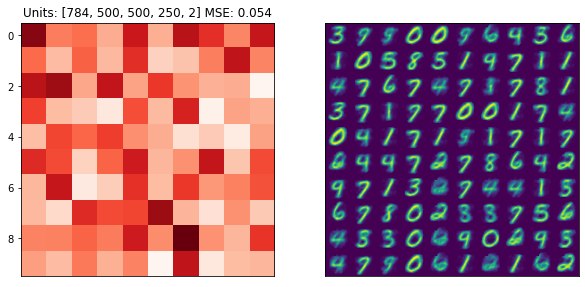

In [6]:
print("\n Network syummary\n")
print(deepNN.get_summary())
deepNN.tie_layer_weights(1,15)
deepNN.tie_layer_weights(3,13)
deepNN.tie_layer_weights(5,11)
deepNN.tie_layer_weights(7,9)
print('\n Layer1 1,3,5,7 and layer 15,13,11,9 are tied\n'
     ',which means they are sharing a weight matrix\n')

deepNN.set_lr(0.1,momentum=0.5)  #set learning rate and momentum

    
deepNN.fit(x_train,x_train,batch_size=100, #fit to data
       epochs=500,x_val=x_val,y_true_val=x_val,patience= 25)

mean = plot_results(deepNN, x_val, [784,500,500,250,2])

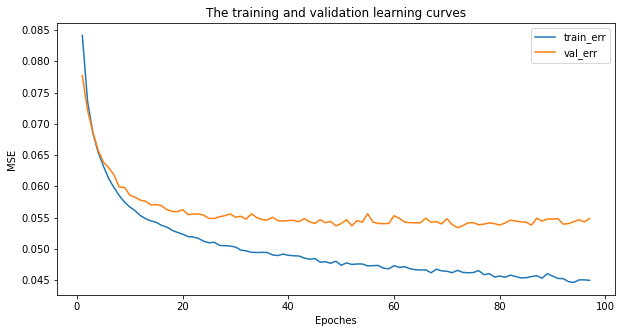

In [7]:
y1=np.array(deepNN.train_err_hist)
y2=np.array(deepNN.val_err_hist)
x=np.linspace(1,len(y1),len(y1))
# print(x)

plt.figure(figsize=(10,5))
plt.title("The training and validation learning curves")
plt.xlabel("Epoches")
plt.ylabel("MSE")
plt.plot(x, y1, label='train_err')
plt.plot(x, y2, label='val_err')
plt.legend()
plt.show()

In [8]:
#Plot the 2D digit representations on a scatter plot from the x_test_2 dataset.
#Remember to use different colours for different digits!

output = deepNN.get_layer_output(x_test_2,8)
print(output.shape)

(1000, 2)


/Users/kai/Desktop/Representation Learning/week4/cw4/AE_student/Code/NN.py:81: RuntimeWarning: overflow encountered in exp
  s = 1.0/(1 + np.exp(-x))


<ipython-input-9-f0bb7d2d4d32>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(output[y_test_2 == i, 0].tolist()


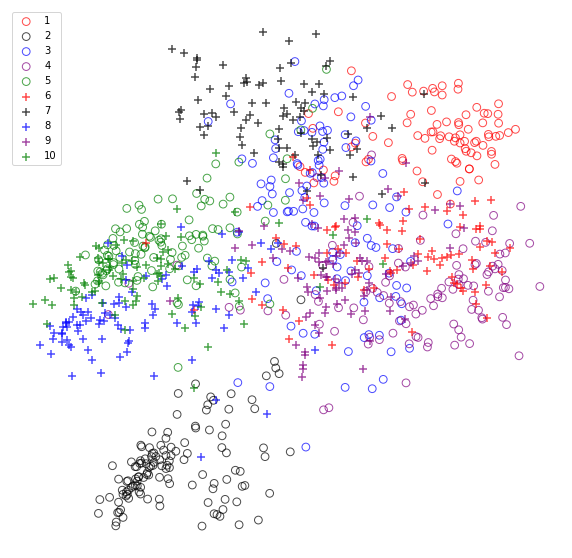

In [9]:


plt.figure(figsize=(10,10))
label=np.linspace(1,10,10)
colors = ['red', 'black', 'blue','purple','green']
# number = 5
# cmap = plt.get_cmap('gnuplot')
# colors = [cmap(i) for i in np.linspace(0, 1, number)]

for i in range(0,5):
    plt.scatter(output[y_test_2 == i, 0].tolist()
                ,output[y_test_2 == i, 1].tolist()
                ,alpha=.7
                ,edgecolors=colors[i]
                ,color=''
                ,marker="o"
                ,s=60
                ,label=int(label[i])
                )
for i in range(5,10):
    plt.scatter(output[y_test_2 == i, 0].tolist()
                ,output[y_test_2 == i, 1].tolist()
                ,alpha=.7
                ,color=colors[i-5]
                ,marker="+"
                ,s=60
                ,label=int(label[i])
                )
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# np.hstack((y_test_2,output))
output[y_test_2 == 0, 0].tolist()
len(output[y_test_2 == 0, 0].tolist())

### <span style="color:red">=========== End of Assignment 8 ===========</span>

In [ ]:
for i in range(5,10):
    print(i)

### <span style="color:red">=========== Assignment 9 ===========</span>

In [ ]:
#Create and train another network, this time without pretraining.
#You can use the plot_results function to see the results.


deepNN_ran = Network([784,500,500,250,2,250,500,500,784]
                ,activations=["sigmoid","sigmoid","sigmoid","linear","sigmoid","sigmoid","sigmoid","sigmoid"])

print("\n Network syummary\n")
print(deepNN_ran.get_summary())
deepNN_ran.tie_layer_weights(1,15)
deepNN_ran.tie_layer_weights(3,13)
deepNN_ran.tie_layer_weights(5,11)
deepNN_ran.tie_layer_weights(7,9)
print('\n Layer1 1,3,5,7 and layer 15,13,11,9 are tied\n'
     ',which means they are sharing a weight matrix\n')

deepNN_ran.set_lr(0.05,momentum=0.5)  #set learning rate and momentum

    
deepNN_ran.fit(x_train,x_train,batch_size=100, #fit to data
       epochs=500,x_val=x_val,y_true_val=x_val,patience= 25)

mean = plot_results(deepNN_ran, x_val, [784,500,500,250,2])


 Network syummary

0: Input	 in:(None, 784)	 out:(None, 784)
1: Dense	 in:(None, 784)	 out:(None, 500)
2: Sigmoid	 in:(None, 500)	 out:(None, 500)
3: Dense	 in:(None, 500)	 out:(None, 500)
4: Sigmoid	 in:(None, 500)	 out:(None, 500)
5: Dense	 in:(None, 500)	 out:(None, 250)
6: Sigmoid	 in:(None, 250)	 out:(None, 250)
7: Dense	 in:(None, 250)	 out:(None, 2)
8: Linear	 in:(None, 2)	 out:(None, 2)
9: Dense	 in:(None, 2)	 out:(None, 250)
10: Sigmoid	 in:(None, 250)	 out:(None, 250)
11: Dense	 in:(None, 250)	 out:(None, 500)
12: Sigmoid	 in:(None, 500)	 out:(None, 500)
13: Dense	 in:(None, 500)	 out:(None, 500)
14: Sigmoid	 in:(None, 500)	 out:(None, 500)
15: Dense	 in:(None, 500)	 out:(None, 784)
16: Sigmoid	 in:(None, 784)	 out:(None, 784)
None

 Layer1 1,3,5,7 and layer 15,13,11,9 are tied
,which means they are sharing a weight matrix

46:	 train err: 0.06693	 val err: 0.06795	 patience: 0		

In [ ]:
output_ran = deepNN_ran.get_layer_output(x_test_2,8)
print(output_ran.shape)

In [ ]:
#Plot 2D representations for the new network.
plt.figure(figsize=(10,10))
label=np.linspace(1,10,10)
colors = ['red', 'black', 'blue','purple','green']
for i in range(0,5):
    plt.scatter(output_ran[y_test_2 == i, 0].tolist()
                ,output_ran[y_test_2 == i, 1].tolist()
                ,alpha=.6
                ,c=colors[i]
                ,marker="o"
                ,label=int(label[i])
                )
for i in range(5,10):
    plt.scatter(output_ran[y_test_2 == i, 0].tolist()
                ,output_ran[y_test_2 == i, 1].tolist()
                ,alpha=.6
                ,c=colors[i-5]
                ,marker="+"
                ,s=60
                ,label=int(label[i])
                )
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
#Create a plot of training metrics.

plt.figure(figsize=(10,5))
plt.xlabel("Epoch")
plt.ylabel("MSE")
y1=np.array(deepNN_ran.train_err_hist)
y2=np.array(deepNN_ran.val_err_hist)
x=np.linspace(1,len(y1),len(y1))
# print(x)


plt.title("The training and validation learning curves")
plt.plot(x, y1, label='train_err')
plt.plot(x, y2, label='val_err')
plt.legend()
plt.show()
plt.show()

### <span style="color:red">=========== End of Assignment 9 ===========</span>